In [1]:
from SCHdeepinsight import immune
import pandas as pd
import numpy as np
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, auc, average_precision_score

In [2]:
!pip show SCHdeepinsight

Name: SCHdeepinsight
Version: 0.3.5
Summary: A tool for processing and hierarchically annotating immune scRNA-seq data with DeepInsight and CNN.
Home-page: https://github.com/shangruJia/scHDeepInsight
Author: Shangru JIA
Author-email: jiashangru@g.ecc.u-tokyo.ac.jp
License: 
Location: /home/shangru/anaconda3/envs/jia/lib/python3.11/site-packages
Requires: anndata, efficientnet_pytorch, huggingface_hub, numpy, opencv-python, pandas, Pillow, rpy2, scanpy, scikit-learn, scipy, torch, torchvision
Required-by: 


In [3]:
# Initialize the folder of results
classifier = immune("./sample_test")

results = classifier.run_pipeline(
    input_file="sample_test.h5ad",
    ref_file="reference.rds", 
    batch_size=128
)

Loaded pretrained weights for efficientnet-b5
Starting pipeline with input: sample_test.h5ad
Step 1: Batch correction
Performing batch correction...
Writing matrix files...
Loading reference data...
Reading matrix files...
Creating Seurat object...


R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')



Normalizing data


R[write to console]: Normalizing layer: counts

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to con

Aligning genes...
Finding anchors...


R[write to console]: Preparing PCA embeddings for objects...



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~43s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=59s  
  |                                                  | 0 % ~calculating   |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=04m 40s
Integrating data...


R[write to console]: Warning:
R[write to console]:  Layer counts isn't present in the assay object; returning NULL

R[write to console]: Warning:
R[write to console]:  Layer counts isn't present in the assay object; returning NULL



Extracting query cells...
--------- Time Summary ---------
Total execution time: 645.017 seconds
                      10.7502833333333 minutes
Saving the results...


R[write to console]: Creating h5Seurat file for version 3.1.5.9900

R[write to console]: Adding data for integrated

R[write to console]: Adding variable features for integrated

R[write to console]: No feature-level metadata found for integrated

R[write to console]: Validating h5Seurat file

R[write to console]: Warning:
R[write to console]:  Cannot find assayRNA in the h5Seurat file

R[write to console]: Adding data from integrated as X

R[write to console]: Transfering meta.data to obs



Batch correction process completed successfully.
The corrected file was saved as batch_corrected_query.h5ad in the output directory.
Step 2: Image transformation
Transforming data to images...
Step 3: Cell type prediction
Making predictions...
Processed 128/45897 images
Processed 1408/45897 images
Processed 2688/45897 images
Processed 3968/45897 images
Processed 5248/45897 images
Processed 6528/45897 images
Processed 7808/45897 images
Processed 9088/45897 images
Processed 10368/45897 images
Processed 11648/45897 images
Processed 12928/45897 images
Processed 14208/45897 images
Processed 15488/45897 images
Processed 16768/45897 images
Processed 18048/45897 images
Processed 19328/45897 images
Processed 20608/45897 images
Processed 21888/45897 images
Processed 23168/45897 images
Processed 24448/45897 images
Processed 25728/45897 images
Processed 27008/45897 images
Processed 28288/45897 images
Processed 29568/45897 images
Processed 30848/45897 images
Processed 32128/45897 images
Processed 3

In [4]:
test = anndata.read_h5ad("sample_test.h5ad")
results = results.set_index("barcode")
if (results.index == test.obs.index).all():
    results["real_type"] = test.obs["author_cell_type"].values
results

,predicted_base_type,predicted_detailed_type,base_type_probability,detailed_type_probability,is_potential_rare,real_type
barcode,,,,,,
ACTGATGAGAGCAATT-1-IN_NIB_B001_L001,Megakaryocytes/platelets,Megakaryocytes/platelets,0.999417,1.000000,False,Platelet
AGCGTCGAGGTGCACA-1-IN_NIB_B001_L001,B,B_plasma(IgA),0.999902,0.999834,False,Plasma_Cell
ATGAGGGAGGCTAGCA-1-IN_NIB_B001_L001,Megakaryocytes/platelets,Megakaryocytes/platelets,0.994598,1.000000,False,Platelet
CGTCCATAGGAGTTTA-1-IN_NIB_B001_L001,Megakaryocytes/platelets,Megakaryocytes/platelets,0.935318,1.000000,False,Platelet
CTAACTTCATGCATGT-1-IN_NIB_B001_L001,Megakaryocytes/platelets,Megakaryocytes/platelets,0.998458,1.000000,False,Platelet
...,...,...,...,...,...,...
TGATTTCCACGGTAGA-TH_MAH_B004_L002,CD4+T,CD4+T_naive,0.956177,0.994633,False,CD4+_T_naive
TTAGTTCTCCACTGGG-TH_MAH_B004_L002,CD4+T,CD4+T_CM,0.642197,0.920476,False,CD4+_T_cm
TTCGGTCAGACTAGAT-TH_MAH_B004_L002,MAIT,MAIT,0.992553,1.000000,False,MAIT


In [5]:
# Cell labals mapping principle
detailed_type_mapping = {
    "Platelet": "Megakaryocytes/platelets",
    "naive_B": "B_naive",
    "memory_B": "B_memory",
    "Plasma_Cell": ["B_plasma(IgA)", "B_plasma(IgG)", "B_plasma(IgM)"],
    "CD16+_NK": "NK_CD16+",
    "CD56+_NK": "NK_CD56+",
    "CD4+_T_naive": "CD4+T_naive",
    "CD4+_T_cm": "CD4+T_CM",
    "CD4+_T_cyt": "CD4+T_cytotoxic",
    "CD8+_T_naive": "CD8+T_naive",
    "Treg": "Treg",
    "CD14+_Monocyte": "Mono_CD14+",
    "CD16+_Monocyte": "Mono_CD16+",
    "cDC2": "DC_cDC2",
    "pDC": "DC_pDC",
    "ILC": ["ILC", "ILC_ILC2", "ILC_ILC3"],
    "MAIT": "MAIT",
    "gdT": "OtherT_gdT",
    "dnT": "OtherT_dnT"
}

Overall Accuracy: 0.9357
F1 Score: 0.9281
AUPRC: 0.8974


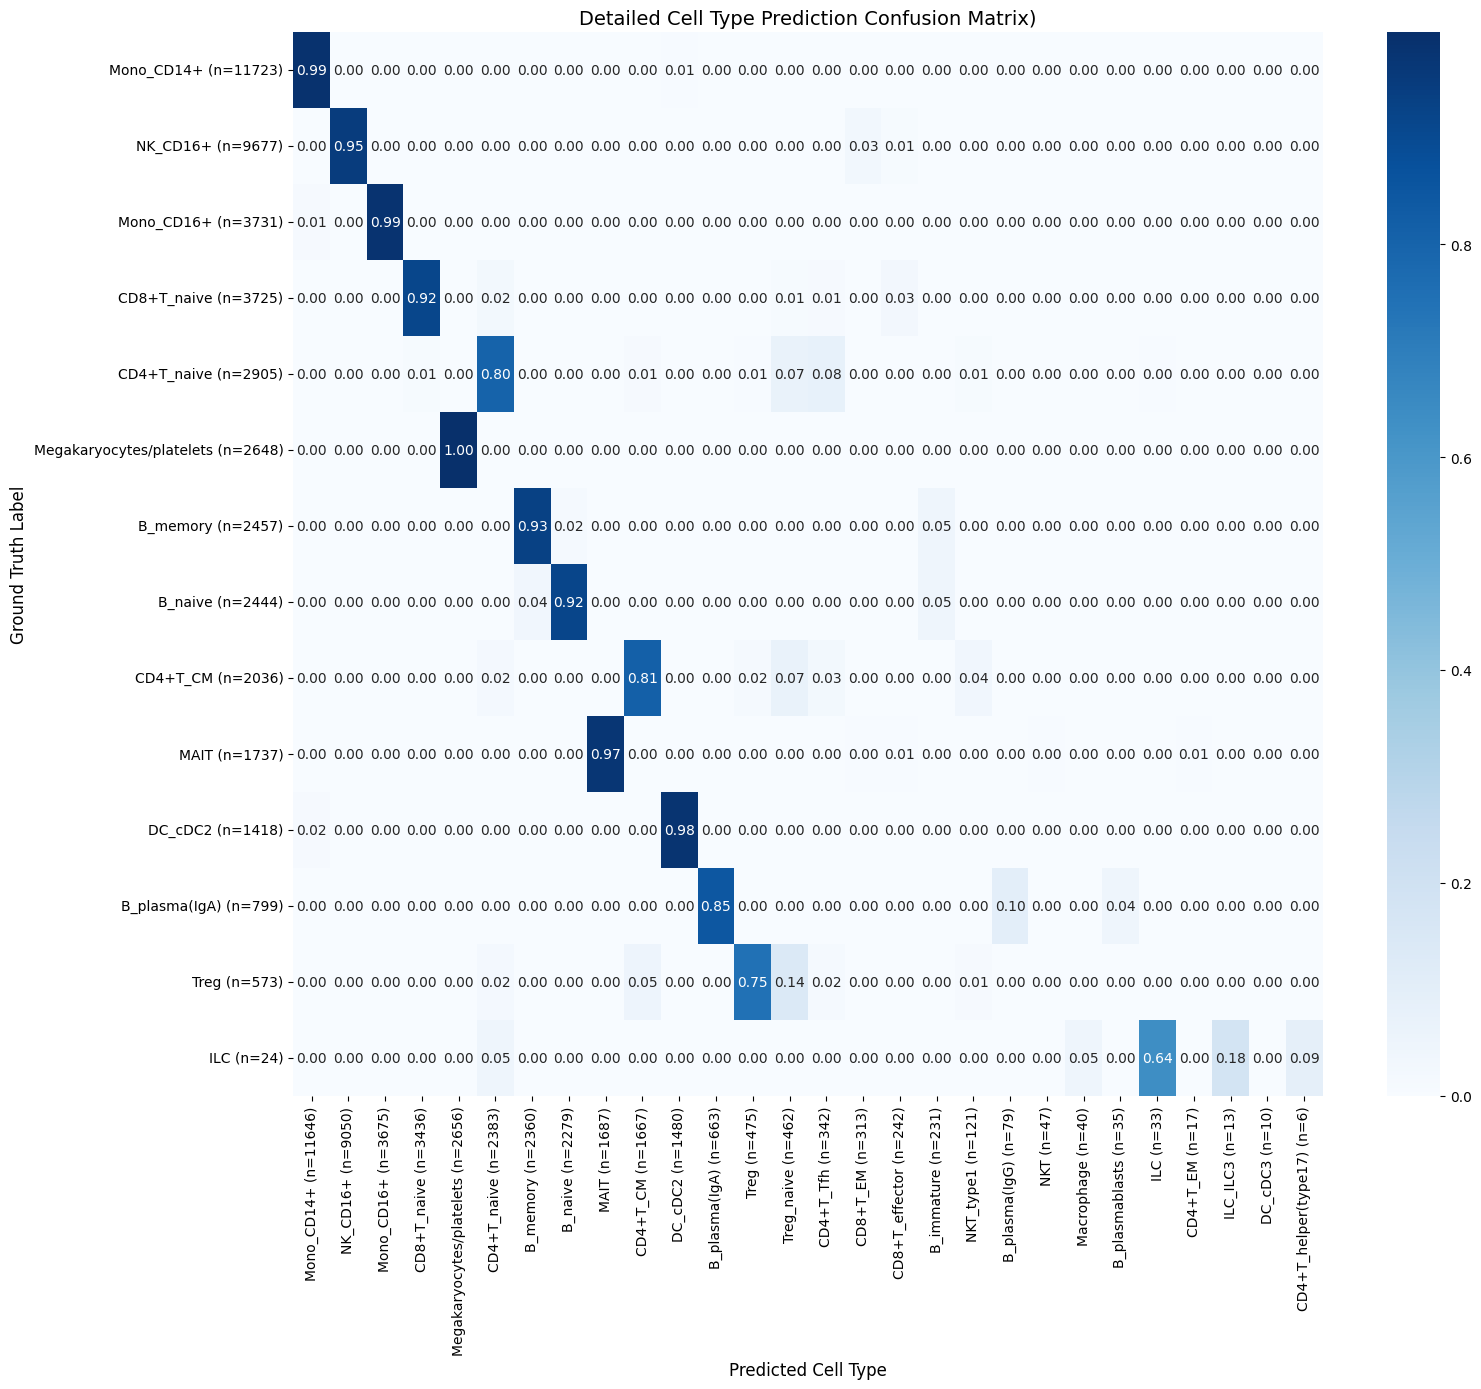

In [6]:
plt.rcParams['font.family'] = 'sans-serif'

def map_real_to_detailed(real_type):
    mapped = detailed_type_mapping.get(real_type)
    if mapped is None:
        return np.nan
    if isinstance(mapped, list):
        
        # For multiple mappings, choose the first one as the representative
        return mapped[0]
    return mapped

# Add mapped detailed type column
results['mapped_detailed_type'] = results['real_type'].apply(map_real_to_detailed)

# Remove rows with NaN mappings
valid_df = results.dropna(subset=['mapped_detailed_type', 'predicted_detailed_type'])

def is_correct_prediction(row):
    actual_type = row['real_type']
    predicted = row['predicted_detailed_type']
    
    expected = detailed_type_mapping.get(actual_type)
    if expected is None:
        return False
    
    if isinstance(expected, list):
        return predicted in expected
    else:
        return predicted == expected

# Add a column indicating correct predictions
valid_df['is_correct'] = valid_df.apply(is_correct_prediction, axis=1)

# Calculate overall accuracy
correct_predictions = valid_df['is_correct'].sum()
total_predictions = len(valid_df)
overall_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

# Calculate F1 Score correctly considering the mapping
# Create a list of all unique detailed types
all_detailed_types = sorted(set([detailed_type for types in detailed_type_mapping.values() 
                             for detailed_type in (types if isinstance(types, list) else [types])]))

# Create binary matrices for true and predicted labels
y_true_binary = np.zeros((len(valid_df), len(all_detailed_types)))
y_pred_binary = np.zeros((len(valid_df), len(all_detailed_types)))

for i, (_, row) in enumerate(valid_df.iterrows()):
    actual_type = row['real_type']
    predicted = row['predicted_detailed_type']
    
    # Set true labels based on mapping
    expected = detailed_type_mapping.get(actual_type)
    if expected is not None:
        if isinstance(expected, list):
            for exp_type in expected:
                if exp_type in all_detailed_types:
                    idx = all_detailed_types.index(exp_type)
                    y_true_binary[i, idx] = 1
        else:
            if expected in all_detailed_types:
                idx = all_detailed_types.index(expected)
                y_true_binary[i, idx] = 1
    
    # Set predicted label
    if predicted in all_detailed_types:
        idx = all_detailed_types.index(predicted)
        y_pred_binary[i, idx] = 1

# Calculate macro F1 score
macro_f1 = f1_score(y_true_binary, y_pred_binary, average='weighted', zero_division=0)

# Calculate AUPRC (Area Under Precision-Recall Curve)
# For multi-label classification, we calculate the average precision
# Find valid columns that have at least one positive example
valid_columns = np.where(np.sum(y_true_binary, axis=0) > 0)[0]

if len(valid_columns) > 0:
    average_precision = average_precision_score(
        y_true_binary[:, valid_columns], 
        y_pred_binary[:, valid_columns], 
        average='weighted'
    )
else:
    average_precision = 0

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"F1 Score: {macro_f1:.4f}")
print(f"AUPRC: {average_precision:.4f}")

# For each main cell type, find the top 3 most frequent predicted types
main_types = valid_df['mapped_detailed_type'].unique()
top_predictions_by_main = {}

for main_type in main_types:
    # Filter data for this main type
    main_type_data = valid_df[valid_df['mapped_detailed_type'] == main_type]
    
    # Count occurrences of each predicted type
    prediction_counts = main_type_data['predicted_detailed_type'].value_counts()
    
    # Get top 3 (or fewer if there aren't 3)
    top_3 = prediction_counts.nlargest(3).index.tolist()
    top_predictions_by_main[main_type] = top_3

# Create a list of all top predicted types across all main types
all_top_predicted = []
for top_3_list in top_predictions_by_main.values():
    all_top_predicted.extend(top_3_list)

# Remove duplicates while preserving order
all_top_predicted = list(dict.fromkeys(all_top_predicted))

# Filter the dataframe to only include rows with these top predicted types
filtered_df = valid_df[valid_df['predicted_detailed_type'].isin(all_top_predicted)]

main_type_counts = {}
for main_type in main_types:
    count = len(valid_df[valid_df['mapped_detailed_type'] == main_type])
    main_type_counts[main_type] = count

predicted_type_counts = {}
for pred_type in all_top_predicted:
    count = len(valid_df[valid_df['predicted_detailed_type'] == pred_type])
    predicted_type_counts[pred_type] = count

# Sort main_types by cell counts (y-axis)
sorted_main_types = sorted(
    [mt for mt in main_types if mt in filtered_df['mapped_detailed_type'].unique()],
    key=lambda x: main_type_counts[x],
    reverse=True
)

# Sort main_types by cell counts (x-axis)
sorted_predicted_types = sorted(
    all_top_predicted,
    key=lambda x: predicted_type_counts[x],
    reverse=True
)

# Create a dense matrix for the confusion matrix and collect flow data
cm_data = np.zeros((len(sorted_main_types), len(sorted_predicted_types)))
flow_data = []

for i, main_type in enumerate(sorted_main_types):
    main_type_data = filtered_df[filtered_df['mapped_detailed_type'] == main_type]
    total_count = len(main_type_data)
    
    if total_count > 0:
        for j, pred_type in enumerate(sorted_predicted_types):
            # Count actual predictions (not normalized)
            count = len(main_type_data[main_type_data['predicted_detailed_type'] == pred_type])
            
            # Store for sankey diagram
            if count > 0:
                flow_data.append((main_type, pred_type, count))
                
            # Normalize for confusion matrix
            cm_data[i, j] = count / total_count if total_count > 0 else 0

main_type_labels = [f"{main_type} (n={main_type_counts[main_type]})" for main_type in sorted_main_types]
predicted_type_labels = [f"{pred_type} (n={predicted_type_counts[pred_type]})" for pred_type in sorted_predicted_types]

# Plot the confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(
    cm_data, 
    annot=True, 
    fmt='.2f', 
    cmap='Blues',
    xticklabels=predicted_type_labels,
    yticklabels=main_type_labels
)
plt.xlabel('Predicted Cell Type', fontsize=12)
plt.ylabel('Ground Truth Label', fontsize=12)
plt.title('Detailed Cell Type Prediction Confusion Matrix)', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('detailed_type_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()